<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/gmm_generativeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
# Last amended: 22nd April, 2021
# My folder:
# Ref: Page 248, Aurelien
# Also see: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
# Objectives:
#           i)  Using GMM as a generative model
#           ii) Generate digits
#           iii)Generate faces
#
"""

### Generating images

A face can be assumed to be nothing but a bundle of many Gaussian clusters oriented as per prominent facial features (see below images):

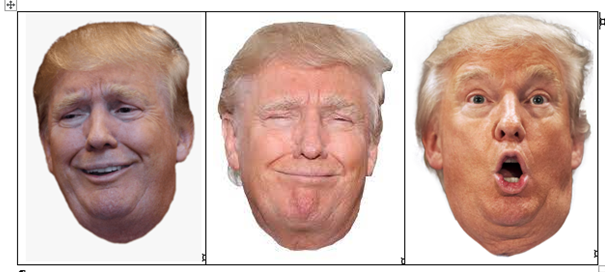



Of course, face is a mixture of not two or three but many gaussian components. So, train a GMM on faces with sufficient number of components--the more the better. And allow a large number of iterations. Once distributions have been learnt, then those distributions can be used to generate points--For example, in a dense region (low variance) there will be large number of points producing a 'darker colour' region while in a sparse region (high variance) less density of points would give an effect to a lighter colour (shade). See below three clusters learnt on a face.    

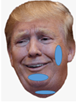

In [1]:
# 1.0 Call libraries
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_olivetti_faces
# 1.1 Import GaussianMixture class
from sklearn.mixture import GaussianMixture
# 1.2 Data manipulation
import pandas as pd
import numpy as np
# 1.3 Plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
# 1.4
import time

In [15]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# 2.1 Get mnist-data
data, target = load_digits(return_X_y = True)
data.shape    # (1797,54)

(1797, 64)

3

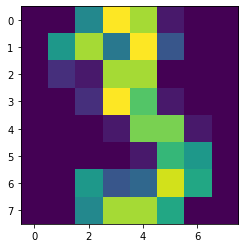

In [3]:
# 2.2
imshow(data[0, :].reshape(8,8))
target[0]
# 2.3
imshow(data[3, :].reshape(8,8))
target[3]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


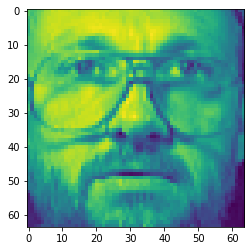

In [4]:
# 2.4 Else, get olivetti faces data
# Data downloaded to /home/ashok/scikit_learn_data
faces,_ = fetch_olivetti_faces(return_X_y=True, shuffle=True)
faces.shape    # (400, 4096)
# 2.4.1 Look at just one face
imshow(faces[0, :].reshape(64,64))

In [8]:
##########################################
#     Gaussian Mixture Modeling         ##
##########################################

# 4.1 Instantiate GMM class
# 4.1.1 for digits
gm_digits = GaussianMixture(
                           n_components = 10,   # For digits,0 to 9
                           n_init = 10,
                           max_iter = 100
                         )


In [9]:
# 4.1.2 for faces
gm_faces = GaussianMixture(
                           n_components = 3,   # More the clusters, more the time
                           n_init = 10,
                           max_iter = 100
                         )



In [10]:
# 4.2 Train the algorithm
# 4.2.1 Ist on mnist data
#       Takes less time
gm_digits.fit(data)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [12]:
# 4.2.2 Also, on faces data
#       This takes time
start = time.time()
gm_faces.fit(faces)
end = time.time()
(end - start)/60     # 4 minutes

6.991905474662781

In [13]:
# 4.3 Did algorithm(s) converge?
gm_digits.converged_    # True
gm_faces.converged_     # True

True

In [16]:
# 4.4 How many iterations did they perform?
gm_digits.n_iter_     # 18 (or more)
print()
gm_faces.n_iter_      #  2

13

2

In [17]:
# 4.5 Clusters labels (mnist data only)
gm_digits.predict(data)
print()
target          # May compare with originals

array([1, 7, 7, ..., 7, 3, 7])

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# 4.6 Create a dataframe for easy comparisions
df = pd.DataFrame()
df['target'] = target
df['cluster'] = gm_digits.predict(data)
df.head(20)

In [ ]:
# 4.7 Predict allocation of faces to clusters
gm_faces.predict(faces)

In [20]:
# 4.8 GMM is a generative model.
#     Generate 20 samples from each cluster

# 4.8.1 Ist for mnist digits
gen_digits = gm_digits.sample(n_samples = 20)  # generate 20 samples
len(gen_digits)        # tuple with 2-elements
gen_digits[0].shape    # (20,64)
im = gen_digits[0]
im.shape               # (20,64)

2

(20, 64)

(20, 64)

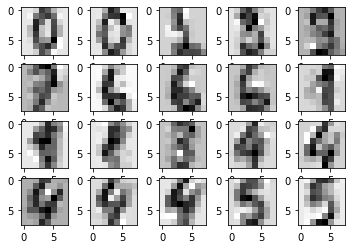

In [22]:
# 5.0 Plot all 20-digits
for i in range(20):
    _=plt.subplot(4,5,i+1)
    _=plt.imshow(im[i].reshape(8,8),
                cmap=plt.cm.gray_r,
                interpolation='nearest')

In [23]:
# 6.0 For faces. Generate 20 new faces
#     Takes time
start = time.time()
gen_faces = gm_faces.sample(n_samples = 20)
end = time.time()
(end- start)/60     # 3 minutes


2.7632169206937154

In [24]:
# 6.1 What do we get
len(gen_faces)    # tuple with 2-objects
gen_faces[0].shape   # (20, 4096)


2

(20, 4096)

In [25]:
# 6.2 Plot all 20 faces
im = gen_faces[0]
im.shape    # (20, 4096)

(20, 4096)

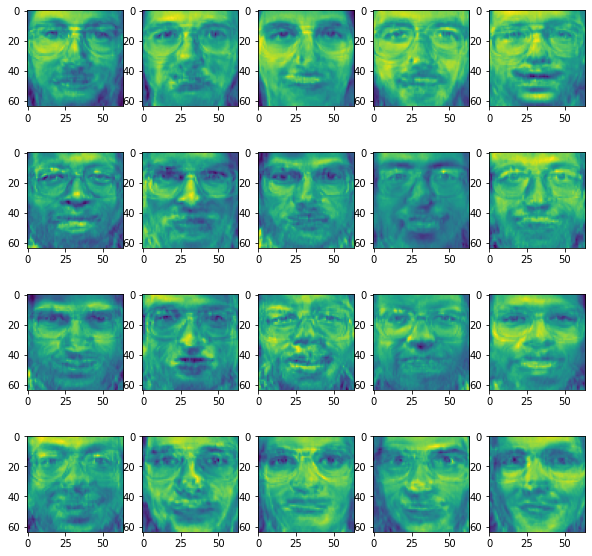

In [27]:
fig = plt.figure(figsize = (10,10))
for i in range(20):
    _=plt.subplot(4,5,i+1)
    _=plt.imshow(im[i].reshape(64,64))
########################## DONE ######################


In [ ]:
######### I am done ##########33